In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

### 정확도 계산 함수 모음

In [195]:
def print_confusion_matrix_pp(value_title,y_test, y_pred):#confusion matrix 출력-pp
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,
                         index = ['l_fg','l_fist','l_tb','r_fg','r_fist','r_tb'], 
                         columns = ['l_fg','l_fist','l_tb','r_fg','r_fist','r_tb'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title(value_title)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    plt.clf()
def print_confusion_matrix_cnv(value_title,y_test, y_pred):#confusion matrix 출력-cnv
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,
                         index=['l_1','l_2','l_3','l_4','l_5','l_fist','r_1','r_2','r_3','r_4','r_5','r_fist'], 
                         columns =['l_1','l_2','l_3','l_4','l_5','l_fist','r_1','r_2','r_3','r_4','r_5','r_fist'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title(value_title)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    plt.clf()
def print_auc_roc_pp(value_title,model, x_test,y_test):#ROC curve 출력-pp

    #Calculate the y_score
    y_score = model.predict_proba(x_test)
    #Binarize the output
    y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5])
    n_classes = y_test_bin.shape[1]

    sum=0
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr_sum=[]
    tpr_sum=[]


    colors = ['blue', 'red', 'green','m','c','y']
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        fpr_sum.append(fpr[i])
        tpr_sum.append(tpr[i])
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2)
        print('AUC for Class {}: {}'.format(i, auc(fpr[i], tpr[i])))
        sum+=auc(fpr[i], tpr[i])
        
    print("average sum:", sum/3)
    fpr_avg=[]
    tpr_avg=[]
    for i in range(max(fpr_sum[0].shape[0],fpr_sum[1].shape[0],fpr_sum[2].shape[0],fpr_sum[3].shape[0],
                      fpr_sum[4].shape[0],fpr_sum[5].shape[0])):
        num=0
        sum2=0
        if i< fpr_sum[0].shape[0]:
            num+=1
            sum2+=fpr_sum[0][i]
        if i< fpr_sum[1].shape[0]:
            num+=1
            sum2+=fpr_sum[1][i]
        if i< fpr_sum[2].shape[0]:
            num+=1
            sum2+=fpr_sum[2][i]
        if i< fpr_sum[3].shape[0]:
            num+=1
            sum2+=fpr_sum[3][i]
        if i< fpr_sum[4].shape[0]:
            num+=1
            sum2+=fpr_sum[4][i]
        if i< fpr_sum[5].shape[0]:
            num+=1
            sum2+=fpr_sum[5][i]

        fpr_avg.append(sum2/num)

    for i in range(max(tpr_sum[0].shape[0],tpr_sum[1].shape[0],tpr_sum[2].shape[0],tpr_sum[3].shape[0],
                      tpr_sum[4].shape[0],tpr_sum[5].shape[0])):
        num=0
        sum2=0
        if i< tpr_sum[0].shape[0]:
            num+=1
            sum2+=tpr_sum[0][i]
        if i< tpr_sum[1].shape[0]:
            num+=1
            sum2+=tpr_sum[1][i]
        if i< tpr_sum[2].shape[0]:
            num+=1
            sum2+=tpr_sum[2][i]
        if i< tpr_sum[3].shape[0]:
            num+=1
            sum2+=tpr_sum[3][i]
        if i< tpr_sum[4].shape[0]:
            num+=1
            sum2+=tpr_sum[4][i]
        if i< tpr_sum[5].shape[0]:
            num+=1
            sum2+=tpr_sum[5][i]

        tpr_avg.append(sum2/num)
        
#     return fpr_avg, tpr_avg
    plt.plot(fpr_avg, tpr_avg, color='blue', lw=2)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curves - '+value_title)
    plt.show()

def print_auc_roc_cnv(value_title,model, x_test,y_test):#ROC curve 출력-cnv

    #Calculate the y_score
    y_score = model.predict_proba(x_test)
    #Binarize the output
    y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9,10,11])
    n_classes = y_test_bin.shape[1]

    sum=0
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr_sum=[]
    tpr_sum=[]

    colors = ['blue', 'red', 'green','m','c','y','indianred','cadetblue','lightpink','aqua','yellow','dimgray']

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        fpr_sum.append(fpr[i])
        tpr_sum.append(tpr[i])
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2)
        print('AUC for Class {}: {}'.format(i, auc(fpr[i], tpr[i])))
        sum+=auc(fpr[i], tpr[i])
        
    print("average sum:", sum/3)
    fpr_avg=[]
    tpr_avg=[]
    for i in range(max(fpr_sum[0].shape[0],fpr_sum[1].shape[0],fpr_sum[2].shape[0],fpr_sum[3].shape[0],
                      fpr_sum[4].shape[0],fpr_sum[5].shape[0],
                      fpr_sum[6].shape[0],fpr_sum[7].shape[0],fpr_sum[8].shape[0],fpr_sum[9].shape[0],
                      fpr_sum[10].shape[0],fpr_sum[11].shape[0],)):
        num=0
        sum2=0
        if i< fpr_sum[0].shape[0]:
            num+=1
            sum2+=fpr_sum[0][i]
        if i< fpr_sum[1].shape[0]:
            num+=1
            sum2+=fpr_sum[1][i]
        if i< fpr_sum[2].shape[0]:
            num+=1
            sum2+=fpr_sum[2][i]
        if i< fpr_sum[3].shape[0]:
            num+=1
            sum2+=fpr_sum[3][i]
        if i< fpr_sum[4].shape[0]:
            num+=1
            sum2+=fpr_sum[4][i]
        if i< fpr_sum[5].shape[0]:
            num+=1
            sum2+=fpr_sum[5][i]
        if i< fpr_sum[6].shape[0]:
            num+=1
            sum2+=fpr_sum[6][i]
        if i< fpr_sum[7].shape[0]:
            num+=1
            sum2+=fpr_sum[7][i]
        if i< fpr_sum[8].shape[0]:
            num+=1
            sum2+=fpr_sum[8][i]
        if i< fpr_sum[9].shape[0]:
            num+=1
            sum2+=fpr_sum[9][i]
        if i< fpr_sum[10].shape[0]:
            num+=1
            sum2+=fpr_sum[10][i]
        if i< fpr_sum[11].shape[0]:
            num+=1
            sum2+=fpr_sum[11][i]

        fpr_avg.append(sum2/num)

    for i in range(max(tpr_sum[0].shape[0],tpr_sum[1].shape[0],tpr_sum[2].shape[0],tpr_sum[3].shape[0],
                      tpr_sum[4].shape[0],tpr_sum[5].shape[0])):
        num=0
        sum2=0
        if i< tpr_sum[0].shape[0]:
            num+=1
            sum2+=tpr_sum[0][i]
        if i< tpr_sum[1].shape[0]:
            num+=1
            sum2+=tpr_sum[1][i]
        if i< tpr_sum[2].shape[0]:
            num+=1
            sum2+=tpr_sum[2][i]
        if i< tpr_sum[3].shape[0]:
            num+=1
            sum2+=tpr_sum[3][i]
        if i< tpr_sum[4].shape[0]:
            num+=1
            sum2+=tpr_sum[4][i]
        if i< tpr_sum[5].shape[0]:
            num+=1
            sum2+=tpr_sum[5][i]
        if i< tpr_sum[6].shape[0]:
            num+=1
            sum2+=tpr_sum[6][i]
        if i< tpr_sum[7].shape[0]:
            num+=1
            sum2+=tpr_sum[7][i]
        if i< tpr_sum[8].shape[0]:
            num+=1
            sum2+=tpr_sum[8][i]
        if i< tpr_sum[9].shape[0]:
            num+=1
            sum2+=tpr_sum[9][i]
        if i< tpr_sum[10].shape[0]:
            num+=1
            sum2+=tpr_sum[10][i]
        if i< tpr_sum[11].shape[0]:
            num+=1
            sum2+=tpr_sum[11][i]

        tpr_avg.append(sum2/num)
        
#     return fpr_avg, tpr_avg
    plt.plot(fpr_avg, tpr_avg, color='blue', lw=2)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curves - '+value_title)
    plt.show()
def print_pr_curve_pp(value_title,model, x_test,y_test):#pr curve 출력-pp
    #Calculate the y_score
    y_score = model.predict_proba(x_test)
    print(y_score.shape[1])
    #Binarize the output

    colors = ['blue', 'red', 'green','m','c','y']
    y_test_bin=label_binarize(y_test, classes=[0,1,2,3,4,5])


    n_classes = y_test_bin.shape[1]
    
    sum=0
    pr = dict()
    rc = dict()
    #roc_auc = dict()
    pr_sum=[]
    rc_sum=[]

    pr_avg=[]
    rc_avg=[]

    
    for i in range(n_classes):

        pr[i], rc[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        base_rate=y_score[:, i].mean()
        pr_sum.append(pr[i])
        rc_sum.append(rc[i])
        plt.plot(rc[i], pr[i], color=colors[i], lw=2)

    for i in range(max(pr_sum[0].shape[0],pr_sum[1].shape[0],pr_sum[2].shape[0],pr_sum[3].shape[0],
                       pr_sum[4].shape[0],pr_sum[5].shape[0])):
        num=0
        sum2=0
        if i< pr_sum[0].shape[0]:
            num+=1
            sum2+=pr_sum[0][i]
        if i< pr_sum[1].shape[0]:
            num+=1
            sum2+=pr_sum[1][i]
        if i< pr_sum[2].shape[0]:
            num+=1
            sum2+=pr_sum[2][i]
        if i< pr_sum[3].shape[0]:
            num+=1
            sum2+=pr_sum[3][i]
        if i< pr_sum[4].shape[0]:
            num+=1
            sum2+=pr_sum[4][i]
        if i< pr_sum[5].shape[0]:
            num+=1
            sum2+=pr_sum[5][i]

        pr_avg.append(sum2/num)

    for i in range(max(rc_sum[0].shape[0],rc_sum[1].shape[0],rc_sum[2].shape[0],rc_sum[3].shape[0],
                      rc_sum[4].shape[0],rc_sum[5].shape[0])):
        num=0
        sum2=0
        if i< rc_sum[0].shape[0]:
            num+=1
            sum2+=rc_sum[0][i]
        if i< rc_sum[1].shape[0]:
            num+=1
            sum2+=rc_sum[1][i]
        if i< rc_sum[2].shape[0]:
            num+=1
            sum2+=rc_sum[2][i]
        if i< rc_sum[3].shape[0]:
            num+=1
            sum2+=rc_sum[3][i]
        if i< rc_sum[4].shape[0]:
            num+=1
            sum2+=rc_sum[4][i]
        if i< rc_sum[5].shape[0]:
            num+=1
            sum2+=rc_sum[5][i]

        rc_avg.append(sum2/num)
        
#     return pr_avg, rc_avg


    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(value_title)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - '+value_title)
    plt.show()
def print_pr_curve_cnv(value_title,model, x_test,y_test):#pr curve 출력-cnv
    #Calculate the y_score
    y_score = model.predict_proba(x_test)
    print(y_score.shape[1])
    #Binarize the output
    

    colors = ['blue', 'red', 'green','m','c','y','indianred','cadetblue','lightpink','aqua','yellow','dimgray']
    y_test_bin=label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9,10,11])

    n_classes = y_test_bin.shape[1]
    
    sum=0
    pr = dict()
    rc = dict()
    #roc_auc = dict()
    pr_sum=[]
    rc_sum=[]

    pr_avg=[]
    rc_avg=[]

    
    for i in range(n_classes):

        pr[i], rc[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        base_rate=y_score[:, i].mean()
        pr_sum.append(pr[i])
        rc_sum.append(rc[i])
        plt.plot(rc[i], pr[i], color=colors[i], lw=2)

    for i in range(max(pr_sum[0].shape[0],pr_sum[1].shape[0],pr_sum[2].shape[0],pr_sum[3].shape[0],
                       pr_sum[4].shape[0],pr_sum[5].shape[0],pr_sum[6].shape[0],pr_sum[7].shape[0],
                  pr_sum[8].shape[0],pr_sum[9].shape[0],pr_sum[10].shape[0],pr_sum[11].shape[0])):
        num=0
        sum2=0
        if i< pr_sum[0].shape[0]:
            num+=1
            sum2+=pr_sum[0][i]
        if i< pr_sum[1].shape[0]:
            num+=1
            sum2+=pr_sum[1][i]
        if i< pr_sum[2].shape[0]:
            num+=1
            sum2+=pr_sum[2][i]
        if i< pr_sum[3].shape[0]:
            num+=1
            sum2+=pr_sum[3][i]
        if i< pr_sum[4].shape[0]:
            num+=1
            sum2+=pr_sum[4][i]
        if i< pr_sum[5].shape[0]:
            num+=1
            sum2+=pr_sum[5][i]
        if i< pr_sum[6].shape[0]:
            num+=1
            sum2+=pr_sum[6][i]
        if i< pr_sum[7].shape[0]:
            num+=1
            sum2+=pr_sum[7][i]
        if i< pr_sum[8].shape[0]:
            num+=1
            sum2+=pr_sum[8][i]
        if i< pr_sum[9].shape[0]:
            num+=1
            sum2+=pr_sum[9][i]
        if i< pr_sum[10].shape[0]:
            num+=1
            sum2+=pr_sum[10][i]
        if i< pr_sum[11].shape[0]:
            num+=1
            sum2+=pr_sum[11][i]
            
        pr_avg.append(sum2/num)

    for i in range(max(rc_sum[0].shape[0],rc_sum[1].shape[0],rc_sum[2].shape[0],rc_sum[3].shape[0],
                      rc_sum[4].shape[0],rc_sum[5].shape[0])):
        num=0
        sum2=0
        if i< rc_sum[0].shape[0]:
            num+=1
            sum2+=rc_sum[0][i]
        if i< rc_sum[1].shape[0]:
            num+=1
            sum2+=rc_sum[1][i]
        if i< rc_sum[2].shape[0]:
            num+=1
            sum2+=rc_sum[2][i]
        if i< rc_sum[3].shape[0]:
            num+=1
            sum2+=rc_sum[3][i]
        if i< rc_sum[4].shape[0]:
            num+=1
            sum2+=rc_sum[4][i]
        if i< rc_sum[5].shape[0]:
            num+=1
            sum2+=rc_sum[5][i]

        rc_avg.append(sum2/num)
        
#     return pr_avg, rc_avg


    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(value_title)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - '+value_title)
    plt.show()

def print_feature_importances(value_title,model, train_data):#fieatur 값 추출
    importances=model.feature_importances_
    indices=np.argsort(importances)[::-1]

    print('Feature ranking:')

    for f in range(train_data.shape[1]):
        print('{}. feature {} ({:.3f})'.format(f+1, train_data.columns[indices][f], importances[indices[f]]))
    plt.figure(figsize=(10,8))
    plt.title('feature importances - '+value_title)
    plt.bar(range(train_data.shape[1]), importances[indices],
            color='r', align='center')
    for i,v in enumerate(range(train_data.shape[1])):
        plt.text(v, importances[indices][i],round(importances[indices][i],2), fontsize=9, color='black', horizontalalignment='center', verticalalignment='bottom')
    plt.xticks(range(train_data.shape[1]), train_data.columns[indices], rotation=45,fontsize=7)
#     total_len=range(train_data.shape[1])
#     plt.set_xticks(np.arrange(0,total_len+1),10)
    plt.xlim([-1,train_data.shape[1]])
    plt.show()

### data 불러오기

In [166]:
#skeleton 좌표값 불러오기
pp=pd.read_csv('./data/total_pp-1_aug_keypoint.csv')
cnv=pd.read_csv('./data/cnv_total-2_aug_keypoint.csv')


### keypoint data와 label data 나누기

In [167]:
#keypoint와 label data로 나누기
pp_X,pp_Y=pp.iloc[:,1:],pp.iloc[:,:1]
cnv_X,cnv_Y=cnv.iloc[:,1:],cnv.iloc[:,:1]

### test data, train data 나누기

In [168]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
#train data와 test data로 나눔,비율은 80 20으로
pp_X_train, pp_X_test, pp_y_train, pp_y_test = train_test_split(pp_X,pp_Y, test_size=0.2, stratify=pp_Y)
cnv_X_train, cnv_X_test, cnv_y_train, cnv_y_test = train_test_split(cnv_X,cnv_Y, test_size=0.2, stratify=cnv_Y)

### 학습하기- xgboost

========pp========
precision: 0.32089554501512707
recall: 0.32083792610108397
f1: 0.3189106753812636


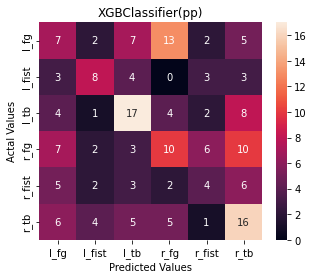

6
AUC for Class 0: 0.5972222222222222
AUC for Class 1: 0.7714849253310792
AUC for Class 2: 0.6857864357864358
AUC for Class 3: 0.7086218836565097
AUC for Class 4: 0.6764069264069263
AUC for Class 5: 0.6136724960254372
average sum: 1.3510649631428702
Feature ranking:
1. feature RING_FINGER_MCP_Z (0.024)
2. feature WRIST_Z (0.021)
3. feature INDEX_FINGER_TIP_X (0.021)
4. feature PINKY_DIP_Y (0.020)
5. feature WRIST_Y (0.020)
6. feature MIDDLE_FINGER_MCP_Y (0.020)
7. feature RING_FINGER_PIP_X (0.020)
8. feature INDEX_FIGNER_PIP_Z (0.020)
9. feature PINKY_DIP_Z (0.019)
10. feature THUMB_MCP_Z (0.019)
11. feature THUMB_IP_Y (0.019)
12. feature THUMB_CMC_Z (0.019)
13. feature PINKY_MCP_Z (0.019)
14. feature RING_FINGER_PIP_Y (0.018)
15. feature WRIST_X (0.018)
16. feature PINKY_TIP_Y (0.018)
17. feature RING_FINGER_DIP_X (0.018)
18. feature INDEX_FINGER_DIP_X (0.018)
19. feature THUMB_IP_Z (0.017)
20. feature PINKY_PIP_Z (0.017)
21. feature RING_FINGER_TIP_Y (0.017)
22. feature RING_FINGER_D

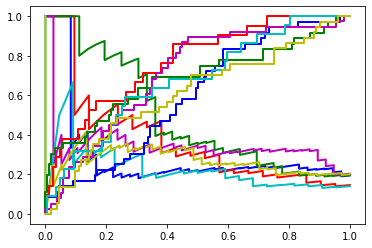

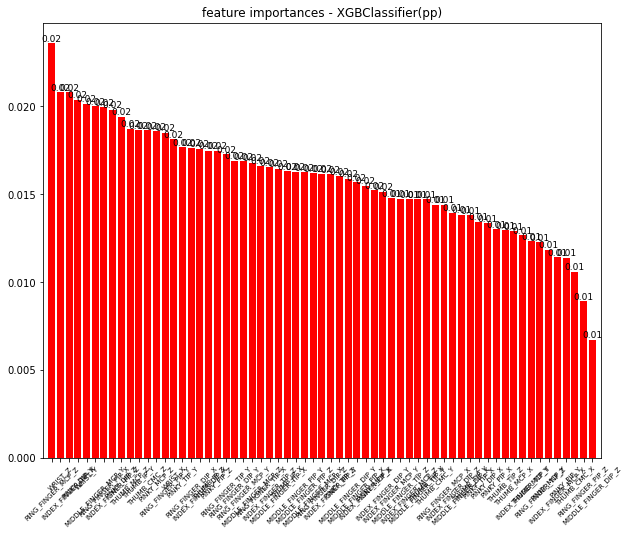

========cnv========
precision: 0.5203675004577668
recall: 0.516491568054068
f1: 0.5127651074612752


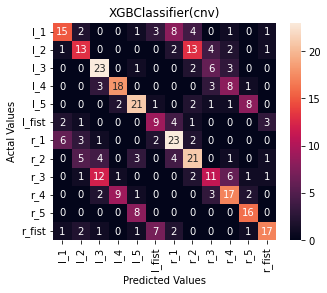

12
AUC for Class 0: 0.9147605856747132
AUC for Class 1: 0.8729166666666667
AUC for Class 2: 0.9291650178076771
AUC for Class 3: 0.9090074296685867
AUC for Class 4: 0.929320987654321
AUC for Class 5: 0.9441489361702128
AUC for Class 6: 0.924791086350975
AUC for Class 7: 0.8373913668031314
AUC for Class 8: 0.9010684606252473
AUC for Class 9: 0.9042086447838804
AUC for Class 10: 0.9472446236559139
AUC for Class 11: 0.9381009615384615
average sum: 3.6507082557999286
Feature ranking:
1. feature WRIST_Z (0.069)
2. feature PINKY_PIP_Z (0.038)
3. feature RING_FINGER_TIP_Z (0.030)
4. feature THUMB_TIP_X (0.029)
5. feature PINKY_TIP_Z (0.026)
6. feature INDEX_FINGER_TIP_Z (0.023)
7. feature THUMB_TIP_Y (0.022)
8. feature PINKY_TIP_Y (0.021)
9. feature MIDDLE_FINGER_PIP_Y (0.020)
10. feature RING_FINGER_MCP_Z (0.019)
11. feature RING_FINGER_PIP_Z (0.019)
12. feature PINKY_MCP_Z (0.018)
13. feature MIDDLE_FINGER_PIP_Z (0.018)
14. feature INDEX_FIGNER_PIP_Z (0.018)
15. feature PINKY_TIP_X (0.017)
1

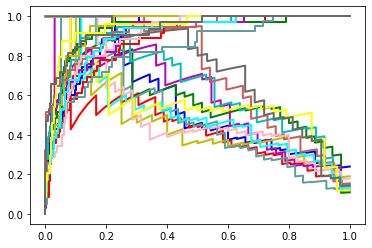

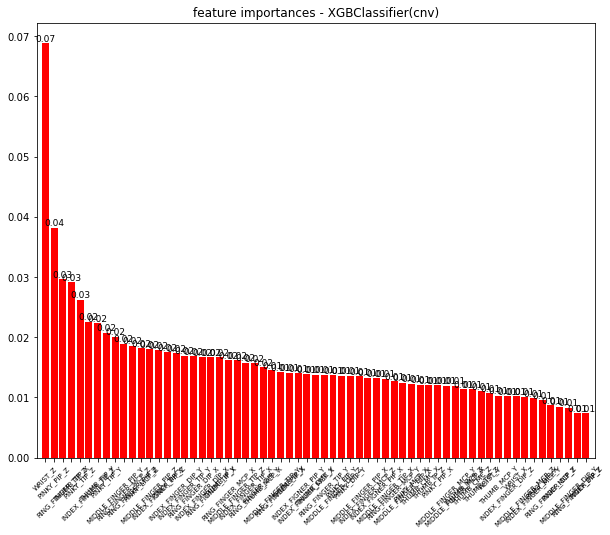

In [231]:
from xgboost import XGBClassifier
#xgboost 학습시키기, 결과 시각화
model=XGBClassifier()
model.fit(pp_X_train, pp_y_train)
pp_y_pred=model.predict(pp_X_test)
print('========pp========')
print('precision:', precision_score(pp_y_test, pp_y_pred, average='macro'))
print('recall:', recall_score(pp_y_test, pp_y_pred, average='macro'))
print('f1:', f1_score(pp_y_test, pp_y_pred, average='macro'))
model.save_model('./model/xgboost_total_pp-1.model')
print_confusion_matrix_pp("XGBClassifier(pp)",pp_y_test,pp_y_pred)
print_pr_curve_pp("XGBClassifier(pp)",model, pp_X_test,pp_y_test)
print_auc_roc_pp("XGBClassifier(pp)",model, pp_X_test,pp_y_test)
# pp_a1,pp_b1=print_pr_curve_pp("XGBClassifier(pp)",model, pp_X_test,pp_y_test)
# pp_c1,pp_d1=print_auc_roc_pp("XGBClassifier(pp)",model, pp_X_test,pp_y_test)
print_feature_importances("XGBClassifier(pp)",model, pp_X_train)

model=XGBClassifier()
model.fit(cnv_X_train, cnv_y_train)
cnv_y_pred=model.predict(cnv_X_test)

print('========cnv========')
print('precision:', precision_score(cnv_y_test, cnv_y_pred, average='macro'))
print('recall:', recall_score(cnv_y_test, cnv_y_pred, average='macro'))
print('f1:', f1_score(cnv_y_test, cnv_y_pred, average='macro'))
model.save_model('./model/xgboost_total_cnv-2.model')
# print(cnv_y_pred)
print_confusion_matrix_cnv("XGBClassifier(cnv)",cnv_y_test,cnv_y_pred)
print_pr_curve_cnv("XGBClassifier(cnv)",model, cnv_X_test,cnv_y_test)
print_auc_roc_cnv("XGBClassifier(cnv)",model, cnv_X_test,cnv_y_test)
# cnv_a1,cnv_b1=print_pr_curve_cnv("XGBClassifier(cnv)",model, cnv_X_test,cnv_y_test)
# cnv_c1,cnv_d1=print_auc_roc_cnv("XGBClassifier(cnv)",model, cnv_X_test,cnv_y_test)
print_feature_importances("XGBClassifier(cnv)",model, cnv_X_train)

### 학습하기 - RandomForestCalssifier

C:\Users\limsomi\AppData\Local\Temp\ipykernel_13280\3776543418.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(pp_X_train, pp_y_train)


========pp========
precision: 0.37100215971458167
recall: 0.3431511655195865
f1: 0.35065740869094625


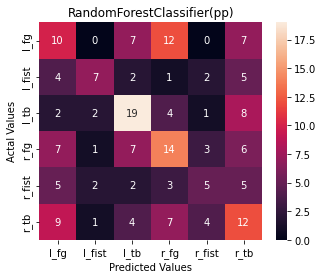

6
AUC for Class 0: 0.6001082251082253
AUC for Class 1: 0.7947309101155255
AUC for Class 2: 0.762536075036075
AUC for Class 3: 0.7200484764542936
AUC for Class 4: 0.6262175324675324
AUC for Class 5: 0.6462639109697934
average sum: 1.3833017100504816
Feature ranking:
1. feature WRIST_Y (0.024)
2. feature PINKY_TIP_Z (0.021)
3. feature PINKY_TIP_X (0.020)
4. feature THUMB_CMC_Z (0.019)
5. feature PINKY_MCP_Y (0.019)
6. feature WRIST_X (0.018)
7. feature PINKY_MCP_Z (0.018)
8. feature PINKY_TIP_Y (0.018)
9. feature THUMB_IP_Z (0.018)
10. feature MIDDLE_FINGER_TIP_Y (0.018)
11. feature THUMB_MCP_X (0.018)
12. feature THUMB_CMC_Y (0.017)
13. feature RING_FINGER_TIP_Y (0.017)
14. feature MIDDLE_FINGER_MCP_Z (0.017)
15. feature PINKY_DIP_Y (0.017)
16. feature THUMB_TIP_Y (0.017)
17. feature RING_FINGER_MCP_Z (0.017)
18. feature INDEX_FINGER_MCP_Y (0.017)
19. feature THUMB_TIP_Z (0.017)
20. feature RING_FINGER_PIP_Y (0.017)
21. feature THUMB_CMC_X (0.016)
22. feature RING_FINGER_MCP_Y (0.016)
2

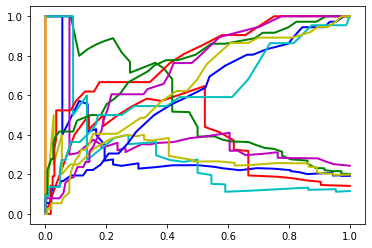

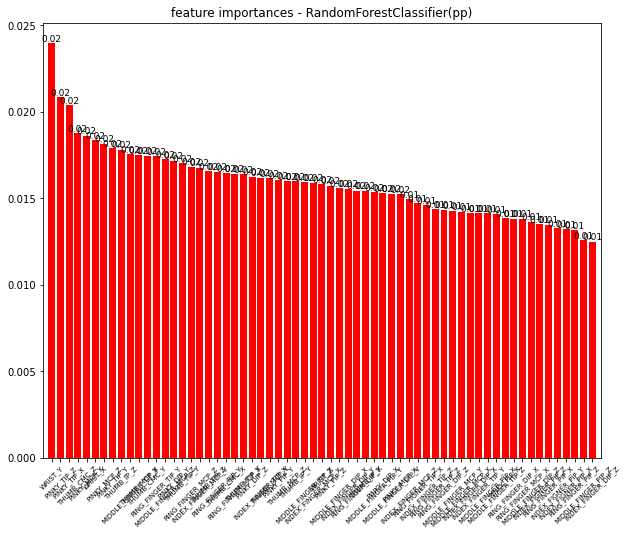

C:\Users\limsomi\AppData\Local\Temp\ipykernel_13280\3776543418.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(cnv_X_train, cnv_y_train)


========cnv========
precision: 0.5118215898449638
recall: 0.5129250799287565
f1: 0.5101916986896368


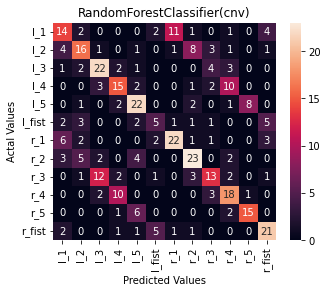

12
AUC for Class 0: 0.9250494657696874
AUC for Class 1: 0.8611496913580247
AUC for Class 2: 0.8977047882865058
AUC for Class 3: 0.8936054762501043
AUC for Class 4: 0.901003086419753
AUC for Class 5: 0.8957446808510638
AUC for Class 6: 0.9098471730783709
AUC for Class 7: 0.8571428571428572
AUC for Class 8: 0.8633953304313415
AUC for Class 9: 0.9050211244718882
AUC for Class 10: 0.9471326164874553
AUC for Class 11: 0.9286572802197802
average sum: 3.5951511902556113
Feature ranking:
1. feature THUMB_TIP_X (0.030)
2. feature WRIST_Z (0.029)
3. feature RING_FINGER_TIP_Z (0.027)
4. feature THUMB_TIP_Y (0.024)
5. feature INDEX_FINGER_TIP_Y (0.022)
6. feature INDEX_FINGER_TIP_X (0.020)
7. feature THUMB_IP_Y (0.019)
8. feature INDEX_FINGER_MCP_Z (0.018)
9. feature MIDDLE_FINGER_MCP_Z (0.018)
10. feature RING_FIGNER_TIP_X (0.018)
11. feature INDEX_FINGER_DIP_Y (0.018)
12. feature PINKY_TIP_Z (0.018)
13. feature RING_FINGER_MCP_Z (0.018)
14. feature THUMB_IP_X (0.018)
15. feature MIDDLE_FINGER_TI

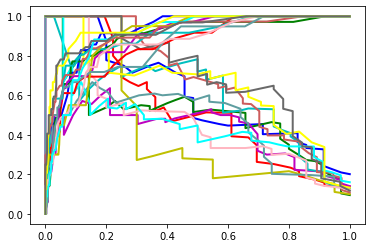

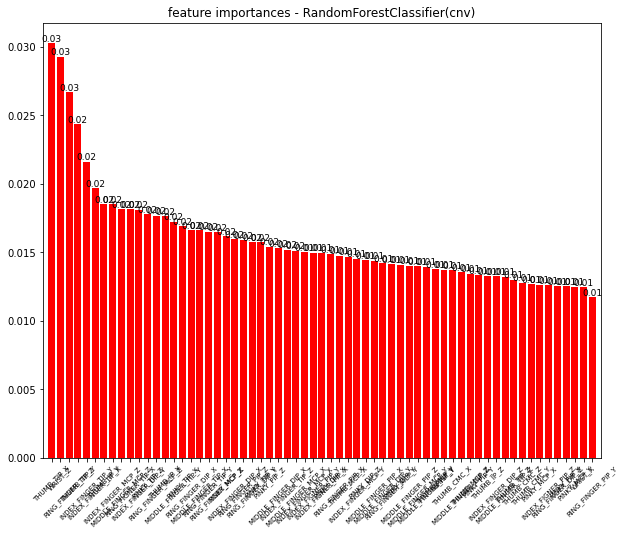

In [226]:
from sklearn.ensemble import RandomForestClassifier
import joblib
import pickle
#RandomForestClassifier 학습시키기, 결과 시각화
model=RandomForestClassifier()
model.fit(pp_X_train, pp_y_train)
pp_y_pred=model.predict(pp_X_test)
print('========pp========')
print('precision:', precision_score(pp_y_test, pp_y_pred, average='macro'))
print('recall:', recall_score(pp_y_test, pp_y_pred, average='macro'))
print('f1:', f1_score(pp_y_test, pp_y_pred, average='macro'))
joblib.dump(model, './model/randomforest_total_pp-1.pkl')
print_confusion_matrix_pp("RandomForestClassifier(pp)",pp_y_test,pp_y_pred)
# pp_a2,pp_b2=print_pr_curve_pp("RandomForestClassifier(pp)",model, pp_X_test,pp_y_test)
# pp_c2,pp_d2=print_auc_roc_pp("RandomForestClassifier(pp)",model, pp_X_test,pp_y_test)
print_pr_curve_pp("RandomForestClassifier(pp)",model, pp_X_test,pp_y_test)
print_auc_roc_pp("RandomForestClassifier(pp)",model, pp_X_test,pp_y_test)
print_feature_importances("RandomForestClassifier(pp)",model, pp_X_train)

model=RandomForestClassifier()
model.fit(cnv_X_train, cnv_y_train)
cnv_y_pred=model.predict(cnv_X_test)
print('========cnv========')
print('precision:', precision_score(cnv_y_test, cnv_y_pred, average='macro'))
print('recall:', recall_score(cnv_y_test, cnv_y_pred, average='macro'))
print('f1:', f1_score(cnv_y_test, cnv_y_pred, average='macro'))
joblib.dump(model, './model/randomforest_total_cnv-2.pkl')
print_confusion_matrix_cnv("RandomForestClassifier(cnv)",cnv_y_test,cnv_y_pred)
print_pr_curve_cnv("RandomForestClassifier(cnv)",model, cnv_X_test,cnv_y_test)
print_auc_roc_cnv("RandomForestClassifier(cnv)",model, cnv_X_test,cnv_y_test)
# cnv_a2,cnv_b2=print_pr_curve_cnv("RandomForestClassifier(cnv)",model, cnv_X_test,cnv_y_test)
# cnv_c2,cnv_d2=print_auc_roc_cnv("RandomForestClassifier(cnv)",model, cnv_X_test,cnv_y_test)
print_feature_importances("RandomForestClassifier(cnv)",model, cnv_X_train)


### 학습하기- GradientBoosting

C:\Users\limsomi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========pp========
precision: 0.3350532368214922
recall: 0.3173151791572844
f1: 0.3219172499718802


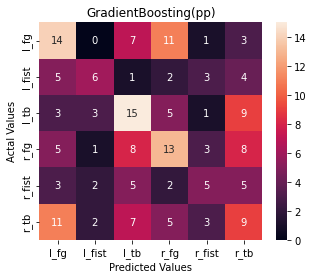

6
AUC for Class 0: 0.659992784992785
AUC for Class 1: 0.6976613130459284
AUC for Class 2: 0.6706349206349207
AUC for Class 3: 0.6670706371191135
AUC for Class 4: 0.6350108225108224
AUC for Class 5: 0.5143967496908673
average sum: 1.2815890759981459
Feature ranking:
1. feature WRIST_Y (0.044)
2. feature WRIST_X (0.033)
3. feature RING_FINGER_TIP_Z (0.030)
4. feature THUMB_TIP_Y (0.027)
5. feature THUMB_CMC_Y (0.026)
6. feature THUMB_MCP_X (0.026)
7. feature THUMB_TIP_X (0.025)
8. feature PINKY_MCP_Z (0.025)
9. feature PINKY_TIP_Z (0.024)
10. feature THUMB_IP_X (0.024)
11. feature RING_FINGER_TIP_Y (0.024)
12. feature PINKY_TIP_X (0.024)
13. feature PINKY_DIP_Y (0.022)
14. feature INDEX_FINGER_TIP_Y (0.021)
15. feature PINKY_TIP_Y (0.020)
16. feature RING_FIGNER_TIP_X (0.020)
17. feature PINKY_DIP_Z (0.020)
18. feature RING_FINGER_PIP_X (0.020)
19. feature PINKY_MCP_X (0.019)
20. feature RING_FINGER_MCP_Y (0.019)
21. feature PINKY_PIP_Y (0.019)
22. feature THUMB_CMC_X (0.017)
23. feature

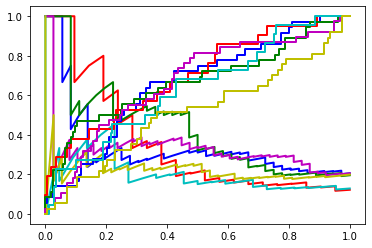

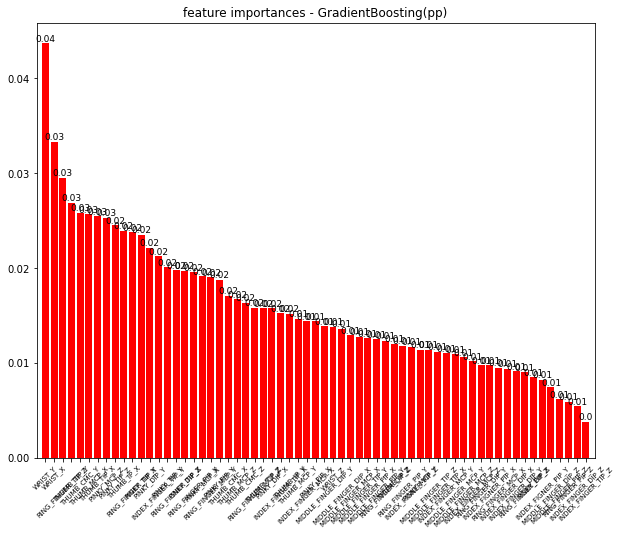

C:\Users\limsomi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========cnv========
precision: 0.4803391070784995
recall: 0.4677095621948562
f1: 0.4693836462272636


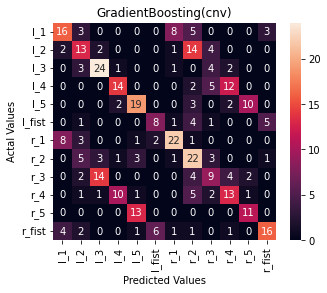

12
AUC for Class 0: 0.9077166600712308
AUC for Class 1: 0.8829475308641975
AUC for Class 2: 0.9255243371586862
AUC for Class 3: 0.9065030469989148
AUC for Class 4: 0.890895061728395
AUC for Class 5: 0.8829787234042552
AUC for Class 6: 0.9125950462997817
AUC for Class 7: 0.8048552754435108
AUC for Class 8: 0.8729719034428176
AUC for Class 9: 0.8748781280467988
AUC for Class 10: 0.9407482078853047
AUC for Class 11: 0.9435954670329672
average sum: 3.58206979612562
Feature ranking:
1. feature THUMB_TIP_X (0.074)
2. feature THUMB_TIP_Y (0.050)
3. feature RING_FINGER_TIP_Z (0.043)
4. feature INDEX_FINGER_TIP_Y (0.042)
5. feature WRIST_Z (0.033)
6. feature INDEX_FINGER_TIP_X (0.032)
7. feature RING_FIGNER_TIP_X (0.028)
8. feature PINKY_PIP_Z (0.027)
9. feature PINKY_TIP_Y (0.027)
10. feature PINKY_TIP_Z (0.025)
11. feature MIDDLE_FINGER_TIP_Y (0.025)
12. feature MIDDLE_FINGER_TIP_X (0.024)
13. feature PINKY_MCP_Z (0.023)
14. feature PINKY_TIP_X (0.022)
15. feature RING_FINGER_TIP_Y (0.021)
16

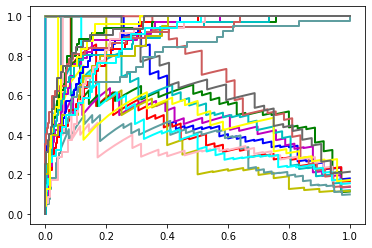

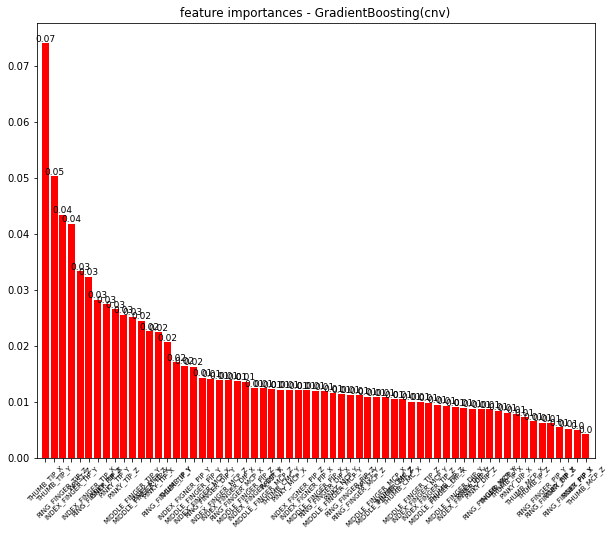

In [227]:
from sklearn.ensemble import GradientBoostingClassifier
#GradientBoostingClassifier 학습시키기, 결과 시각화
model=GradientBoostingClassifier()
model.fit(pp_X_train, pp_y_train)
pp_y_pred=model.predict(pp_X_test)
print('========pp========')
print('precision:', precision_score(pp_y_test, pp_y_pred, average='macro'))
print('recall:', recall_score(pp_y_test, pp_y_pred, average='macro'))
print('f1:', f1_score(pp_y_test, pp_y_pred, average='macro'))
joblib.dump(model, './model/GradientBoosting_total_pp-1.pkl')
print_confusion_matrix_pp("GradientBoosting(pp)",pp_y_test,pp_y_pred)
print_pr_curve_pp("GradientBoosting(pp)",model, pp_X_test,pp_y_test)
print_auc_roc_pp("GradientBoosting(pp)",model, pp_X_test,pp_y_test)
# pp_a3,pp_b3=print_pr_curve_pp("GradientBoosting(pp)",model, pp_X_test,pp_y_test)
# pp_c3,pp_d3=print_auc_roc_pp("GradientBoosting(pp)",model, pp_X_test,pp_y_test)
print_feature_importances("GradientBoosting(pp)",model, pp_X_train)

model=GradientBoostingClassifier()
model.fit(cnv_X_train, cnv_y_train)
cnv_y_pred=model.predict(cnv_X_test)
print('========cnv========')
print('precision:', precision_score(cnv_y_test, cnv_y_pred, average='macro'))
print('recall:', recall_score(cnv_y_test, cnv_y_pred, average='macro'))
print('f1:', f1_score(cnv_y_test, cnv_y_pred, average='macro'))
joblib.dump(model, './model/GradientBoosting_total_cnv-2.pkl')
print_confusion_matrix_cnv("GradientBoosting(cnv)",cnv_y_test,cnv_y_pred)
print_pr_curve_cnv("GradientBoosting(cnv)",model, cnv_X_test,cnv_y_test)
print_auc_roc_cnv("GradientBoosting(cnv)",model, cnv_X_test,cnv_y_test)
# cnv_a3,cnv_b3=print_pr_curve_cnv("GradientBoosting(cnv)",model, cnv_X_test,cnv_y_test)
# cnv_c3,cnv_d3=print_auc_roc_cnv("GradientBoosting(cnv)",model, cnv_X_test,cnv_y_test)
print_feature_importances("GradientBoosting(cnv)",model, cnv_X_train)

### 학습하기-AdaGradient Boosting 

C:\Users\limsomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========pp========
precision: 0.24439919242550823
recall: 0.23369242448189817
f1: 0.2345660452665097


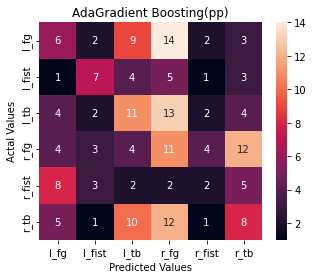

6
AUC for Class 0: 0.5809884559884559
AUC for Class 1: 0.6228515074668921
AUC for Class 2: 0.5942460317460319
AUC for Class 3: 0.49965373961218834
AUC for Class 4: 0.5281385281385281
AUC for Class 5: 0.6191485603250309
average sum: 1.148342274425709
Feature ranking:
1. feature PINKY_TIP_Z (0.080)
2. feature PINKY_PIP_X (0.060)
3. feature RING_FINGER_MCP_Y (0.060)
4. feature WRIST_X (0.060)
5. feature MIDDLE_FINGER_MCP_Z (0.040)
6. feature THUMB_CMC_Z (0.040)
7. feature MIDDLE_FINGER_DIP_Y (0.040)
8. feature THUMB_IP_Z (0.040)
9. feature THUMB_TIP_Z (0.040)
10. feature MIDDLE_FINGER_MCP_X (0.040)
11. feature INDEX_FINGER_TIP_Y (0.040)
12. feature MIDDLE_FINGER_TIP_Y (0.040)
13. feature INDEX_FINGER_DIP_Y (0.020)
14. feature MIDDLE_FINGER_PIP_X (0.020)
15. feature PINKY_DIP_X (0.020)
16. feature INDEX_FINGER_DIP_Z (0.020)
17. feature INDEX_FINGER_MCP_Z (0.020)
18. feature INDEX_FINGER_DIP_X (0.020)
19. feature INDEX_FINGER_MCP_Y (0.020)
20. feature INDEX_FINGER_MCP_X (0.020)
21. feature 

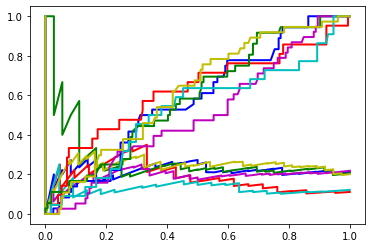

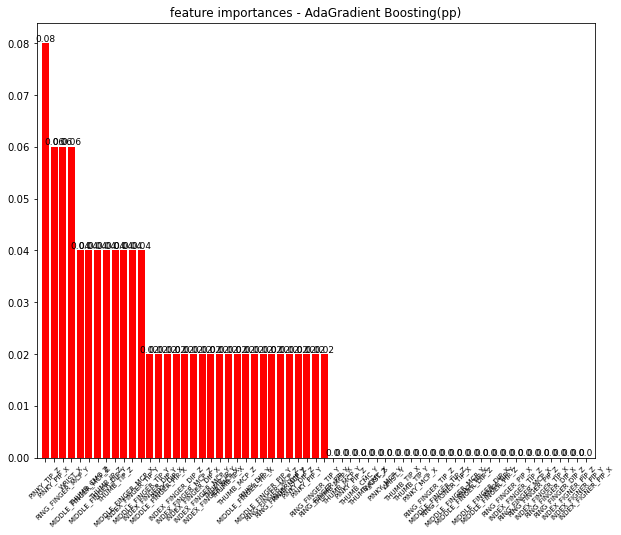

C:\Users\limsomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========cnv========
precision: 0.24706618398252952
recall: 0.24042039951966424
f1: 0.23500470820978217


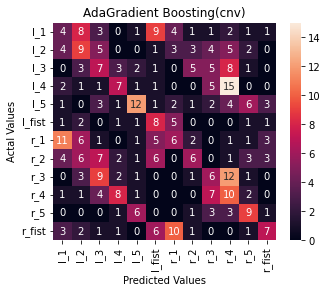

12
AUC for Class 0: 0.6708745548080727
AUC for Class 1: 0.5552083333333333
AUC for Class 2: 0.6338345864661654
AUC for Class 3: 0.8116286835295099
AUC for Class 4: 0.8038966049382715
AUC for Class 5: 0.7481382978723403
AUC for Class 6: 0.6605435519084545
AUC for Class 7: 0.5308841485312074
AUC for Class 8: 0.6113573407202216
AUC for Class 9: 0.688332791680208
AUC for Class 10: 0.84834229390681
AUC for Class 11: 0.7909083104395606
average sum: 2.7846498327113856
Feature ranking:
1. feature THUMB_TIP_X (0.220)
2. feature RING_FINGER_TIP_Z (0.140)
3. feature THUMB_TIP_Y (0.100)
4. feature THUMB_IP_Y (0.100)
5. feature INDEX_FINGER_MCP_Z (0.080)
6. feature INDEX_FINGER_TIP_Y (0.060)
7. feature RING_FIGNER_TIP_X (0.040)
8. feature INDEX_FINGER_MCP_Y (0.040)
9. feature PINKY_MCP_Y (0.040)
10. feature PINKY_MCP_X (0.040)
11. feature RING_FINGER_MCP_X (0.020)
12. feature RING_FINGER_PIP_Z (0.020)
13. feature INDEX_FIGNER_PIP_Y (0.020)
14. feature INDEX_FIGNER_PIP_Z (0.020)
15. feature RING_FIN

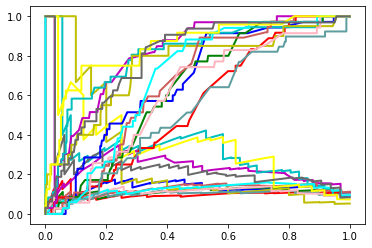

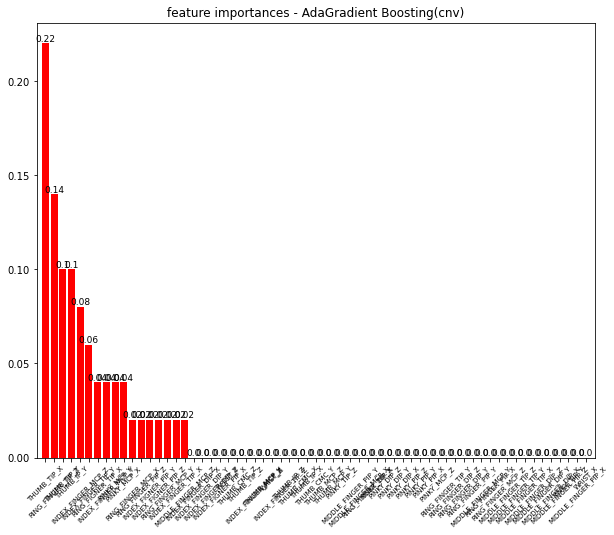

In [228]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier 학습시키기, 결과 시각화
model=AdaBoostClassifier()
model.fit(pp_X_train, pp_y_train)
pp_y_pred=model.predict(pp_X_test)
print('========pp========')
print('precision:', precision_score(pp_y_test, pp_y_pred, average='macro'))
print('recall:', recall_score(pp_y_test, pp_y_pred, average='macro'))
print('f1:', f1_score(pp_y_test, pp_y_pred, average='macro'))
joblib.dump(model, './model/AdaGradientBoosting_total_pp-1.pkl')
print_confusion_matrix_pp("AdaGradient Boosting(pp)",pp_y_test,pp_y_pred)
print_pr_curve_pp("AdaGradient Boosting(pp)",model, pp_X_test,pp_y_test)
print_auc_roc_pp("AdaGradient Boosting(pp)",model, pp_X_test,pp_y_test)
# pp_a4,pp_b4=print_pr_curve_pp("AdaGradient Boosting(pp)",model, pp_X_test,pp_y_test)
# pp_c4,pp_d4=print_auc_roc_pp("AdaGradient Boosting(pp)",model, pp_X_test,pp_y_test)
print_feature_importances("AdaGradient Boosting(pp)",model, pp_X_train)

model=AdaBoostClassifier()
model.fit(cnv_X_train, cnv_y_train)
cnv_y_pred=model.predict(cnv_X_test)
print('========cnv========')
print('precision:', precision_score(cnv_y_test, cnv_y_pred, average='macro'))
print('recall:', recall_score(cnv_y_test, cnv_y_pred, average='macro'))
print('f1:', f1_score(cnv_y_test, cnv_y_pred, average='macro'))
joblib.dump(model, './model/AdaGradientBoosting_total_cnv-2.pkl')
print_confusion_matrix_cnv("AdaGradient Boosting(cnv)",cnv_y_test,cnv_y_pred)
print_pr_curve_cnv("AdaGradient Boosting(cnv)",model, cnv_X_test,cnv_y_test)
print_auc_roc_cnv("AdaGradient Boosting(cnv)",model, cnv_X_test,cnv_y_test)
# cnv_a4,cnv_b4=print_pr_curve_cnv("AdaGradient Boosting(cnv)",model, cnv_X_test,cnv_y_test)
# cnv_c4,cnv_d4=print_auc_roc_cnv("AdaGradient Boosting(cnv)",model, cnv_X_test,cnv_y_test)
print_feature_importances("AdaGradient Boosting(cnv)",model, cnv_X_train)

### 학습하기 - Bagging

C:\Users\limsomi\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========pp========
precision: 0.3729398324986561
recall: 0.37671899514004775
f1: 0.3703051231739756


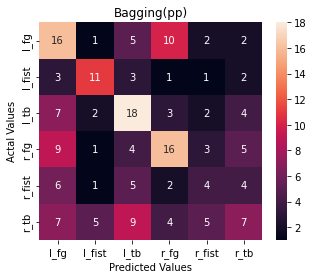

6
AUC for Class 0: 0.6332070707070707
AUC for Class 1: 0.7428853198083967
AUC for Class 2: 0.6800144300144301
AUC for Class 3: 0.666637811634349
AUC for Class 4: 0.6561147186147186
AUC for Class 5: 0.5747217806041335
average sum: 1.3178603771276995


C:\Users\limsomi\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========cnv========
precision: 0.4477486615564384
recall: 0.4242692888832595
f1: 0.43061525165620645


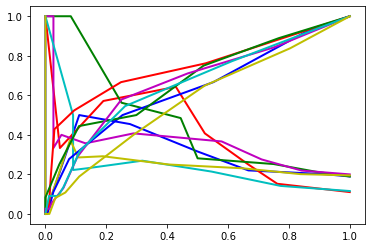

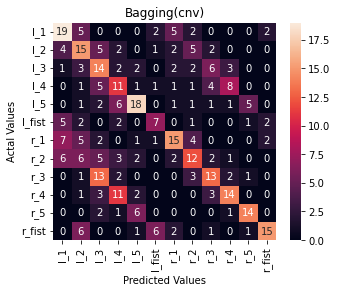

12
AUC for Class 0: 0.8498219232291253
AUC for Class 1: 0.7994212962962961
AUC for Class 2: 0.8370795409576572
AUC for Class 3: 0.7459721178729444
AUC for Class 4: 0.8094521604938271
AUC for Class 5: 0.754720744680851
AUC for Class 6: 0.817473462320259
AUC for Class 7: 0.7529627235509588
AUC for Class 8: 0.7833003561535417
AUC for Class 9: 0.8555817354566135
AUC for Class 10: 0.9186267921146953
AUC for Class 11: 0.8638392857142856
average sum: 3.262750712947019


([0.0,
  0.0016142323217799787,
  0.003901095716354741,
  0.010114010650480397,
  0.025505972069485155,
  0.05102706043731651,
  0.11612571708998541,
  0.30039221069082916,
  0.5811707841358581,
  0.5339223937875655,
  1.0],
 [0.0,
  0.046546391675068154,
  0.10338064189167133,
  0.16912890414728646,
  0.29559256406682877,
  0.44570043963426315,
  0.576050553072612,
  0.7400150385444503,
  0.8654198594038166,
  0.8893338143338143,
  1.0])

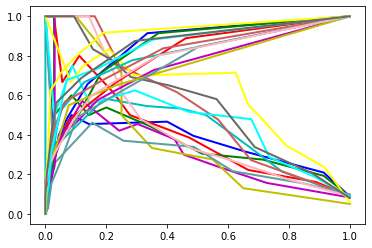

In [233]:
from sklearn.ensemble import BaggingClassifier
#BaggingClassifier 학습시키기, 결과 시각화
model=BaggingClassifier()
model.fit(pp_X_train, pp_y_train)
pp_y_pred=model.predict(pp_X_test)
print('========pp========')
print('precision:', precision_score(pp_y_test, pp_y_pred, average='macro'))
print('recall:', recall_score(pp_y_test, pp_y_pred, average='macro'))
print('f1:', f1_score(pp_y_test, pp_y_pred, average='macro'))
joblib.dump(model, './model/Bagging_total_pp-1.pkl')
print_confusion_matrix_pp("Bagging(pp)",pp_y_test,pp_y_pred)
print_pr_curve_pp("Bagging(pp)",model, pp_X_test,pp_y_test)
print_auc_roc_pp("Bagging(pp)",model, pp_X_test,pp_y_test)
# pp_a5,pp_b5=print_pr_curve_pp("Bagging(pp)",model, pp_X_test,pp_y_test)
# pp_c5,pp_d5=print_auc_roc_pp("Bagging(pp)",model, pp_X_test,pp_y_test)
# print_feature_importances("Bagging(pp)",model, pp_X_train)

model=BaggingClassifier()
model.fit(cnv_X_train, cnv_y_train)
cnv_y_pred=model.predict(cnv_X_test)
print('========cnv========')
print('precision:', precision_score(cnv_y_test, cnv_y_pred, average='macro'))
print('recall:', recall_score(cnv_y_test, cnv_y_pred, average='macro'))
print('f1:', f1_score(cnv_y_test, cnv_y_pred, average='macro'))
joblib.dump(model, './model/Bagging_total_cnv-2.pkl')
print_confusion_matrix_cnv("Bagging(cnv)",cnv_y_test,cnv_y_pred)
print_pr_curve_cnv("Bagging(cnv)",model, cnv_X_test,cnv_y_test)
print_auc_roc_cnv("Bagging(cnv)",model, cnv_X_test,cnv_y_test)
# cnv_a5,cnv_b5=print_pr_curve_cnv("Bagging(cnv)",model, cnv_X_test,cnv_y_test)
# cnv_c5,cnv_d5=print_auc_roc_cnv("Bagging(cnv)",model, cnv_X_test,cnv_y_test)
# print_feature_importances("Bagging(cnv)",model, cnv_X_train)

### 학습하기- ExtraTrees

C:\Users\limsomi\AppData\Local\Temp\ipykernel_13280\4234161943.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(pp_X_train, pp_y_train)


========pp========
precision: 0.3986353407793037
recall: 0.37932404379772805
f1: 0.38206883022529975


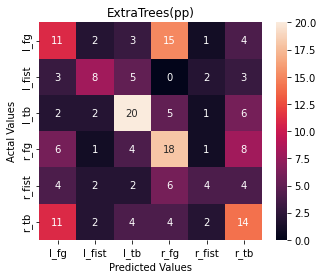

6
AUC for Class 0: 0.6747835497835498
AUC for Class 1: 0.8369963369963369
AUC for Class 2: 0.7632575757575758
AUC for Class 3: 0.6866343490304709
AUC for Class 4: 0.6603084415584416
AUC for Class 5: 0.6735559088500266
average sum: 1.431845387325467
Feature ranking:
1. feature WRIST_Z (0.020)
2. feature WRIST_Y (0.020)
3. feature PINKY_TIP_Z (0.019)
4. feature PINKY_TIP_X (0.019)
5. feature PINKY_TIP_Y (0.019)
6. feature PINKY_MCP_Y (0.018)
7. feature THUMB_IP_Z (0.018)
8. feature PINKY_DIP_X (0.017)
9. feature THUMB_CMC_Z (0.017)
10. feature THUMB_TIP_Y (0.017)
11. feature WRIST_X (0.017)
12. feature RING_FINGER_PIP_Y (0.017)
13. feature INDEX_FINGER_DIP_Y (0.017)
14. feature THUMB_MCP_Z (0.017)
15. feature PINKY_MCP_Z (0.017)
16. feature PINKY_DIP_Y (0.017)
17. feature THUMB_CMC_Y (0.017)
18. feature THUMB_IP_Y (0.017)
19. feature PINKY_PIP_Y (0.016)
20. feature RING_FINGER_DIP_Y (0.016)
21. feature THUMB_TIP_X (0.016)
22. feature THUMB_TIP_Z (0.016)
23. feature RING_FINGER_MCP_Z (0.0

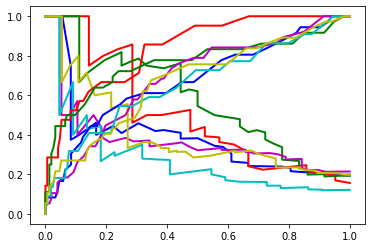

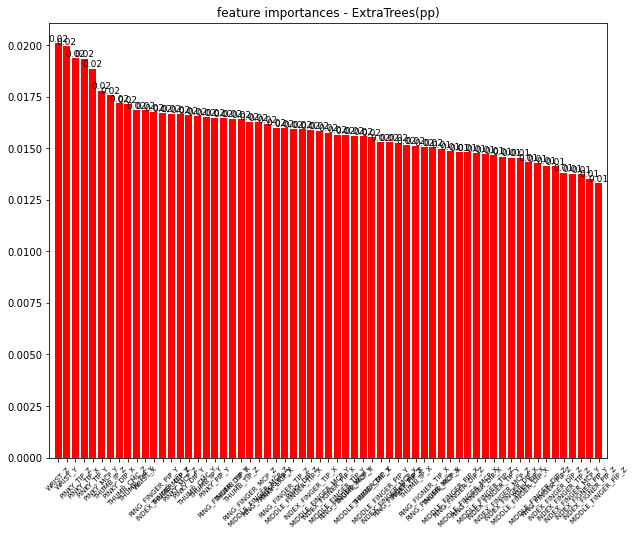

C:\Users\limsomi\AppData\Local\Temp\ipykernel_13280\4234161943.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(cnv_X_train, cnv_y_train)


========cnv========
precision: 0.49188020638128704
recall: 0.4933110737338678
f1: 0.4886777551625392


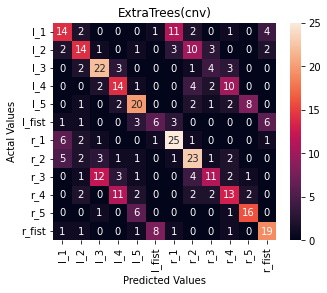

12
AUC for Class 0: 0.9392956074396518
AUC for Class 1: 0.8731095679012345
AUC for Class 2: 0.9250890383854373
AUC for Class 3: 0.9037482260622757
AUC for Class 4: 0.9341820987654321
AUC for Class 5: 0.9324468085106382
AUC for Class 6: 0.9243017390649703
AUC for Class 7: 0.8757810816634346
AUC for Class 8: 0.8917293233082707
AUC for Class 9: 0.8809311017224569
AUC for Class 10: 0.9679659498207885
AUC for Class 11: 0.9014423076923077
average sum: 3.650007616778966
Feature ranking:
1. feature WRIST_Z (0.034)
2. feature THUMB_TIP_X (0.025)
3. feature THUMB_TIP_Y (0.022)
4. feature RING_FINGER_TIP_Z (0.021)
5. feature RING_FIGNER_TIP_X (0.021)
6. feature INDEX_FINGER_TIP_Y (0.020)
7. feature MIDDLE_FINGER_TIP_X (0.019)
8. feature RING_FINGER_TIP_Y (0.019)
9. feature INDEX_FINGER_TIP_X (0.019)
10. feature MIDDLE_FINGER_TIP_Y (0.018)
11. feature PINKY_TIP_Y (0.018)
12. feature PINKY_TIP_X (0.018)
13. feature THUMB_IP_X (0.017)
14. feature THUMB_IP_Y (0.017)
15. feature RING_FINGER_DIP_X (0.0

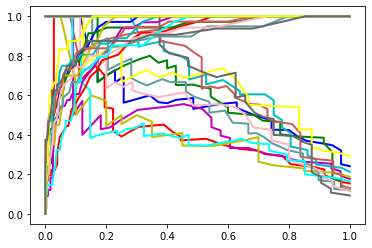

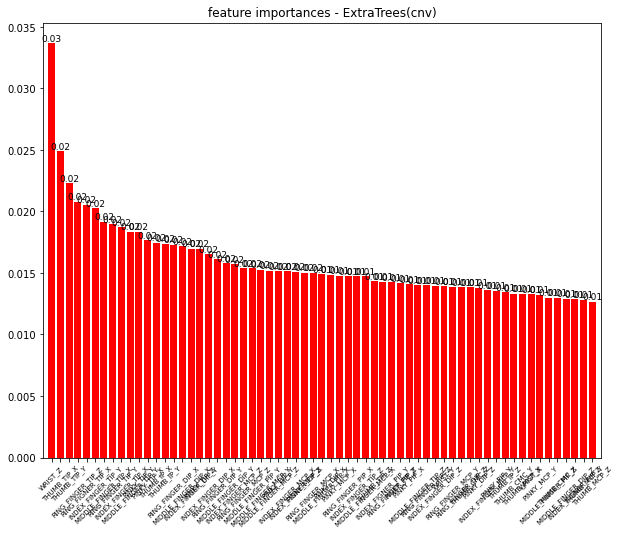

In [230]:
from sklearn.ensemble import ExtraTreesClassifier
#ExtraTrees 학습시키기, 결과 시각화
model=ExtraTreesClassifier()
model.fit(pp_X_train, pp_y_train)
pp_y_pred=model.predict(pp_X_test)
print('========pp========')
print('precision:', precision_score(pp_y_test, pp_y_pred, average='macro'))
print('recall:', recall_score(pp_y_test, pp_y_pred, average='macro'))
print('f1:', f1_score(pp_y_test, pp_y_pred, average='macro'))
joblib.dump(model, './model/ExtraTrees_total_pp-1.pkl')
print_confusion_matrix_pp("ExtraTrees(pp)",pp_y_test,pp_y_pred)
print_pr_curve_pp("ExtraTrees(pp)",model, pp_X_test,pp_y_test)
print_auc_roc_pp("ExtraTrees(pp)",model, pp_X_test,pp_y_test)
# pp_a6,pp_b6=print_pr_curve_pp("ExtraTrees(pp)",model, pp_X_test,pp_y_test)
# pp_c6,pp_d6=print_auc_roc_pp("ExtraTrees(pp)",model, pp_X_test,pp_y_test)
print_feature_importances("ExtraTrees(pp)",model, pp_X_train)

model=ExtraTreesClassifier()
model.fit(cnv_X_train, cnv_y_train)
cnv_y_pred=model.predict(cnv_X_test)
print('========cnv========')
print('precision:', precision_score(cnv_y_test, cnv_y_pred, average='macro'))
print('recall:', recall_score(cnv_y_test, cnv_y_pred, average='macro'))
print('f1:', f1_score(cnv_y_test, cnv_y_pred, average='macro'))
joblib.dump(model, './model/ExtraTrees_total_cnv-2.pkl')
print_confusion_matrix_cnv("ExtraTrees(cnv)",cnv_y_test,cnv_y_pred)
print_pr_curve_cnv("ExtraTrees(cnv)",model, cnv_X_test,cnv_y_test)
print_auc_roc_cnv("ExtraTrees(cnv)",model, cnv_X_test,cnv_y_test)
# cnv_a6,cnv_b6=print_pr_curve_cnv("ExtraTrees(cnv)",model, cnv_X_test,cnv_y_test)
# cnv_c6,cnv_d6=print_auc_roc_cnv("ExtraTrees(cnv)",model, cnv_X_test,cnv_y_test)
print_feature_importances("ExtraTrees(cnv)",model, cnv_X_train)


### 총 분류모델 성능 분석

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

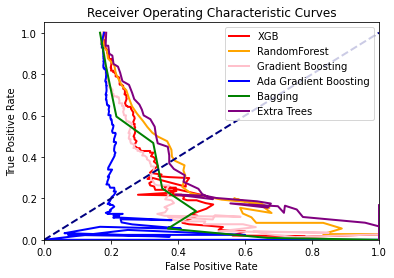

<Figure size 432x288 with 0 Axes>

In [209]:
#각 분류모델의 ROC curve 출력-pp
plt.plot(pp_a1, pp_b1, color='red', lw=2,label='XGB')
plt.plot(pp_a2, pp_b2, color='orange', lw=2, label='RandomForest')
plt.plot(pp_a3, pp_b3, color='pink', lw=2,label='Gradient Boosting')
plt.plot(pp_a4, pp_b4, color='blue', lw=2, label='Ada Gradient Boosting')
plt.plot(pp_a5, pp_b5, color='green', lw=2,label='Bagging')
plt.plot(pp_a6, pp_b6, color='purple', lw=2, label='Extra Trees')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves(pp)')
plt.legend()
plt.show()
plt.clf()

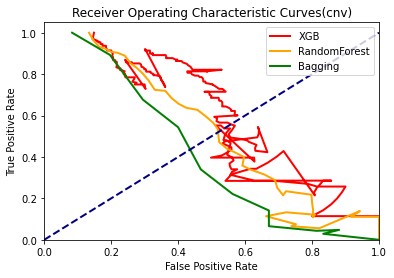

<Figure size 432x288 with 0 Axes>

In [217]:
#각 분류모델의 ROC curve 출력-cnv
plt.plot(cnv_a1, cnv_b1, color='red', lw=2,label='XGB')
plt.plot(cnv_a2, cnv_b2, color='orange', lw=2, label='RandomForest')
# plt.plot(cnv_a3, cnv_b3, color='pink', lw=2,label='Gradient Boosting')
# plt.plot(cnv_a4, cnv_b4, color='blue', lw=2, label='Ada Gradient Boosting')
plt.plot(cnv_a5, cnv_b5, color='green', lw=2,label='Bagging')
# plt.plot(cnv_a6, cnv_b6, color='purple', lw=2, label='Extra Trees')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves(cnv)')
plt.legend()
plt.show()
plt.clf()

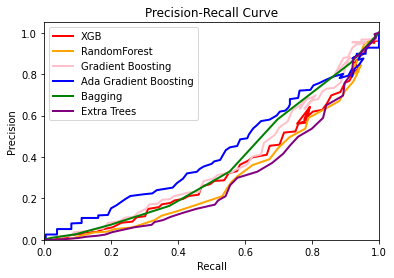

<Figure size 432x288 with 0 Axes>

In [218]:
#각 분류모델의 pr curve 출력-pp
plt.plot(pp_d1, pp_c1, color='red', lw=2,label='XGB')
plt.plot(pp_d2, pp_c2, color='orange', lw=2, label='RandomForest')
plt.plot(pp_d3, pp_c3, color='pink', lw=2,label='Gradient Boosting')
plt.plot(pp_d4, pp_c4, color='blue', lw=2, label='Ada Gradient Boosting')
plt.plot(pp_d5, pp_c5, color='green', lw=2,label='Bagging')
plt.plot(pp_d6, pp_c6, color='purple', lw=2, label='Extra Trees')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve(pp)')
plt.legend()
plt.show()
plt.clf()

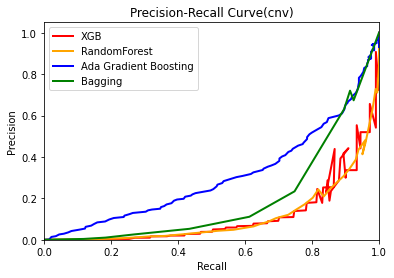

<Figure size 432x288 with 0 Axes>

In [224]:
#각 분류모델의 pr curve 출력-cnv
plt.plot(cnv_d1, cnv_c1, color='red', lw=2,label='XGB')
plt.plot(cnv_d2, cnv_c2, color='orange', lw=2, label='RandomForest')
# plt.plot(cnv_d3, cnv_c3, color='pink', lw=2,label='Gradient Boosting')
plt.plot(cnv_d4, cnv_c4, color='blue', lw=2, label='Ada Gradient Boosting')
plt.plot(cnv_d5, cnv_c5, color='green', lw=2,label='Bagging')
# plt.plot(cnv_d6, cnv_c6, color='purple', lw=2, label='Extra Trees')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve(cnv)')
plt.legend()
plt.show()
plt.clf()